<a href="https://colab.research.google.com/github/srinivasiyengar/NewCastle-University-Internship/blob/main/K_Means_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2  # OpenCV library
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
image_set = []
noisy_set = []

In [ ]:
img = cv2.imread('/12.jpg')
image_set.append(img)
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
img_gauss = cv2.add(img,gauss)
noisy_set.append(img_gauss)

In [ ]:
def k_means_image_segmentation (image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  vectorized = image.reshape((-1, 3))
  vectorized = np.float32(vectorized)

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 5
  attempts = 10
  ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape(image.shape)
  return res2

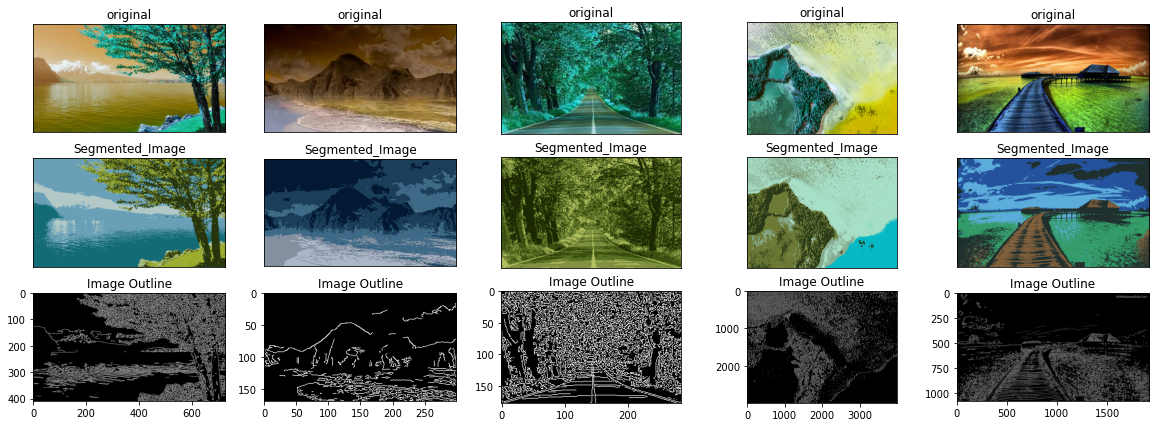

In [ ]:
n = 5 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original
  ax = plt.subplot(3, n, i + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(image_set[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display segmented image
  bx = plt.subplot(3, n, i + n + 1) 
  plt.title("Segmented_Image") 
  segmented_image = k_means_image_segmentation(image_set[i])
  plt.imshow(tf.squeeze(segmented_image)) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display image outline 
  cx = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("Image Outline") 
  image_outline = cv2.Canny(image_set[i], 100, 200)
  plt.imshow(tf.squeeze(image_outline)) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 

plt.show()

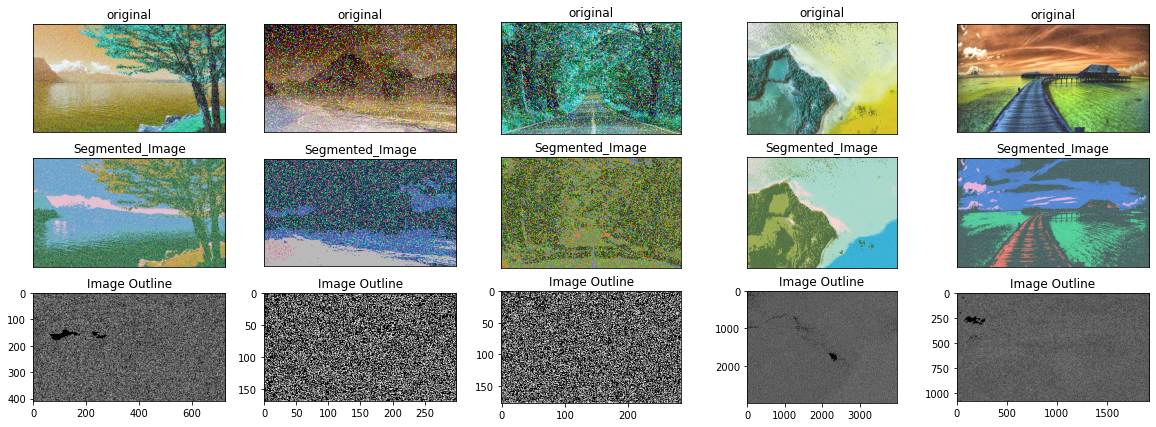

In [ ]:
n = 5 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original
  ax = plt.subplot(3, n, i + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(noisy_set[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display segmented image
  bx = plt.subplot(3, n, i + n + 1) 
  plt.title("Segmented_Image") 
  segmented_image = k_means_image_segmentation(noisy_set[i])
  plt.imshow(tf.squeeze(segmented_image)) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display image outline 
  cx = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("Image Outline") 
  image_outline = cv2.Canny(noisy_set[i], 100, 200)
  plt.imshow(tf.squeeze(image_outline)) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 

plt.show()